<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Linear_Regression(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path=r"/content/Salary_Data.csv"
data=pd.read_csv(path)
data.head()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
from scipy.stats import probplot

In [2]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     YearsExperience  Salary
0             False   False
1             False   False
2             False   False
3             False   False
4             False   False
5             False   False
6             False   False
7             False   False
8             False   False
9             False   False
10            False   False
11            False   False
12            False   False
13            False   False
14            False   False
15            False   False
16            False   False
17            False   False
18            False   False
19            False   False
20            False   False
21            False   False
22            False   False
23            False   False
24            False   False
25            False   False
26            False   False
27            False   False
28            False   False
29            False   False>

<ipython-input-7-4347436f2c9f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'],kde=True)
<ipython-input-7-4347436f2c9f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


Text(0.5, 1.0, "Q-Q plot of 'Salary'")

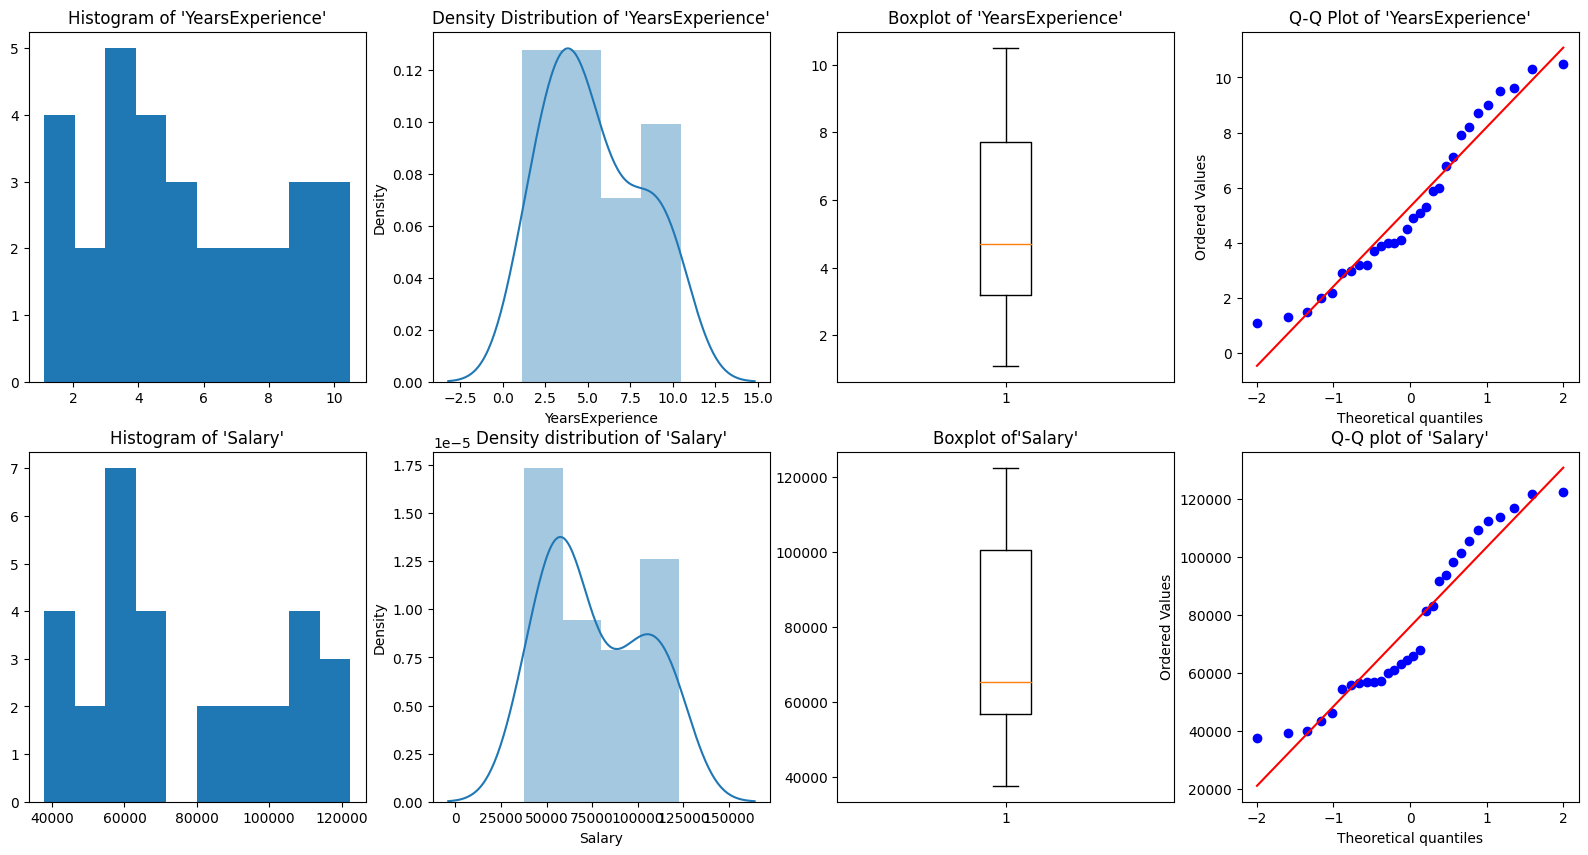

In [7]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(data['YearsExperience'],density=False)
plt.title("Histogram of 'YearsExperience'" )
plt.subplot(2,4,5)
plt.hist(data['Salary'],density=False)
plt.title("Histogram of 'Salary'")

# Desity plot
plt.subplot(2,4,2)
sns.distplot(data['YearsExperience'],kde=True)
plt.title("Density Distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(data['Salary'])
plt.title("Density distribution of 'Salary'")

# Boxplot
plt.subplot(2,4,3)
plt.boxplot(data['YearsExperience'])
plt.title("Boxplot of 'YearsExperience'")
plt.subplot(2,4,7)
plt.boxplot(data['Salary'])
plt.title("Boxplot of'Salary'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(data['YearsExperience'],plot=plt)
plt.title("Q-Q Plot of 'YearsExperience'")
plt.subplot(2,4,8)
probplot(data['Salary'],plot=plt)
plt.title("Q-Q plot of 'Salary'")

In [8]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]






In [9]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [10]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
X_train


,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [13]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [14]:
y_train

27    112635
11     55794
17     83088
22    101302
5      56642
16     66029
8      64445
14     61111
23    113812
20     91738
1      46205
29    121872
6      60150
4      39891
18     81363
19     93940
9      57189
7      54445
25    105582
3      43525
0      39343
21     98273
15     67938
12     56957
Name: Salary, dtype: int64

In [15]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
Name: Salary, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [17]:
y_pred=model.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [18]:
y_pred=model.predict(X_test)
y_pred
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R^2 Score:',r2)

Mean Squared Error: 12823412.298126549
R^2 Score: 0.988169515729126


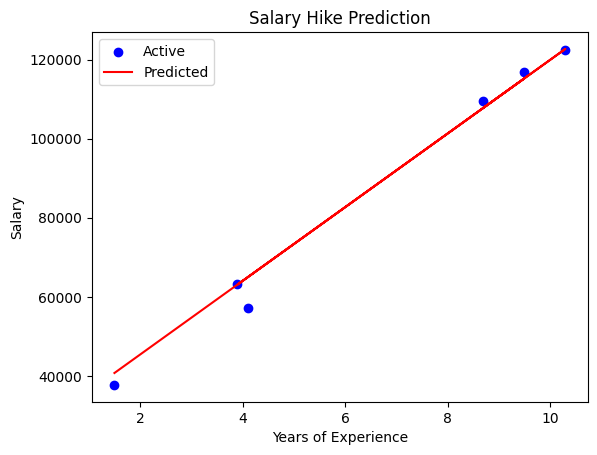

In [19]:
plt.scatter(X_test,y_test,color='b',label='Active')
plt.plot(X_test,y_pred,color='red',label="Predicted")
plt.title('Salary Hike Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [21]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience", data=data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.14e-20
Time:                        10:10:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:

# Square Root Transformation of data
model_sqrt=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.58e-19
Time:                        10:11:02   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Cube Root transformation of data
model_cbrt=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=data).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 21 May 2024   Prob (F-statistic):           6.37e-18
Time:                        10:11:06   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_log=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.40e-16
Time:                        10:11:09   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""